# Breast Cancer Wisconsin (Diagnostic)

Target: Predict whether the cancer is benign or malignant

Source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In this notebook, I will touch medicine in practice. I analyze breast cancer Wisconsin. It is a diagnostic data set.
I studied computer science in medicine, so now I would like to combine medical knowledge with machine learning.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Fine-needle aspiration (FNA) is a diagnostic procedure used to investigate lumps or masses. In this technique, a thin (23–25 gauge), hollow needle is inserted into the mass for sampling of cells that, after being stained, will be examined under a microscope (biopsy).

https://en.wikipedia.org/wiki/Fine-needle_aspiration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

from sklearn import preprocessing

In [2]:
df = pd.read_csv('input/data.csv')
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
299    892399         B       10.510         23.09           66.85      334.2   
371   9012568         B       15.190         13.21           97.65      711.8   
336    897604         B       12.990         14.23           84.08      514.3   
380    901549         B       11.270         12.96           73.16      386.3   
372   9012795         M       21.370         15.10          141.30     1386.0   
412    905539         B        9.397         21.68           59.75      268.8   
257    886776         M       15.320         17.27          103.20      713.3   
330    896839         M       16.030         15.51          105.80      793.2   
32   85382601         M       17.020         23.98          112.80      899.3   
404    904969         B       12.340         14.95           78.29      469.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
299          0.10150           0.06797         0.02495             0.018750   
371          0.07963           0.06934         0.03393             0.026570   
336          0.09462           0.09965         0.03738             0.020980   
380          0.12370           0.11110         0.07900             0.055500   
372          0.10010           0.15150         0.19320             0.125500   
412          0.07969           0.06053         0.03735             0.005128   
257          0.13350           0.22840         0.24480             0.124200   
330          0.09491           0.13710         0.12040             0.070410   
32           0.11970           0.14960         0.24170             0.120300   
404          0.08682           0.04571         0.02109             0.020540   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
299         0.1695                 0.06556     0.2868      1.1430   
371         0.1721                 0.05544     0.1783      0.4125   
336         0.1652                 0.07238     0.1814      0.6412   
380         0.2018                 0.06914     0.2562      0.9858   
372         0.1973                 0.06183     0.3414      1.3090   
412         0.1274                 0.06724     0.1186      1.1820   
257         0.2398                 0.07596     0.6592      1.0590   
330         0.1782                 0.05976     0.3371      0.7476   
32          0.2248                 0.06382     0.6009      1.3980   
404         0.1571                 0.05708     0.3833      0.9078   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
299        2.2890   20.560       0.010170        0.014430       0.01861   
371        1.3380   17.720       0.005012        0.014850       0.01551   
336        0.9219   14.410       0.005231        0.023050       0.03113   
380        1.8090   16.040       0.006635        0.017770       0.02101   
372        2.4070   39.060       0.004426        0.026750       0.03437   
412        1.1740    6.802       0.005515        0.026740       0.03735   
257        4.0610   59.460       0.010150        0.045880       0.04983   
330        2.6290   33.270       0.005839        0.032450       0.03715   
32         3.9990   67.780       0.008268        0.030820       0.05042   
404        2.6020   30.150       0.007702        0.008491       0.01307   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
299           0.012500      0.03464              0.001971        10.930   
371           0.009155      0.01647              0.001767        16.200   
336           0.007315      0.01639              0.005701        13.720   
380           0.011640      0.02108              0.003721        12.840   
372           0.013430      0.01675              0.004367        22.690   
412           0.005128      0.01951              0.004583         9.965   
257           0.021270      0.01884              0.008660        17.730   
330           0.014590      0.01467              0.003121      

### Basic intro

In [3]:
print(df.diagnosis.nunique())
df.diagnosis.unique()

2


array(['M', 'B'], dtype=object)

In [4]:
df['diagnosis_cat'] = pd.factorize(df['diagnosis'])[0]

In [5]:
df.shape

(569, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32',
       'diagnosis_cat'],
      dtype='object')

In [8]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [9]:
df = df.drop(['id', 'Unnamed: 32'], 1)

In [10]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

### Visualisations

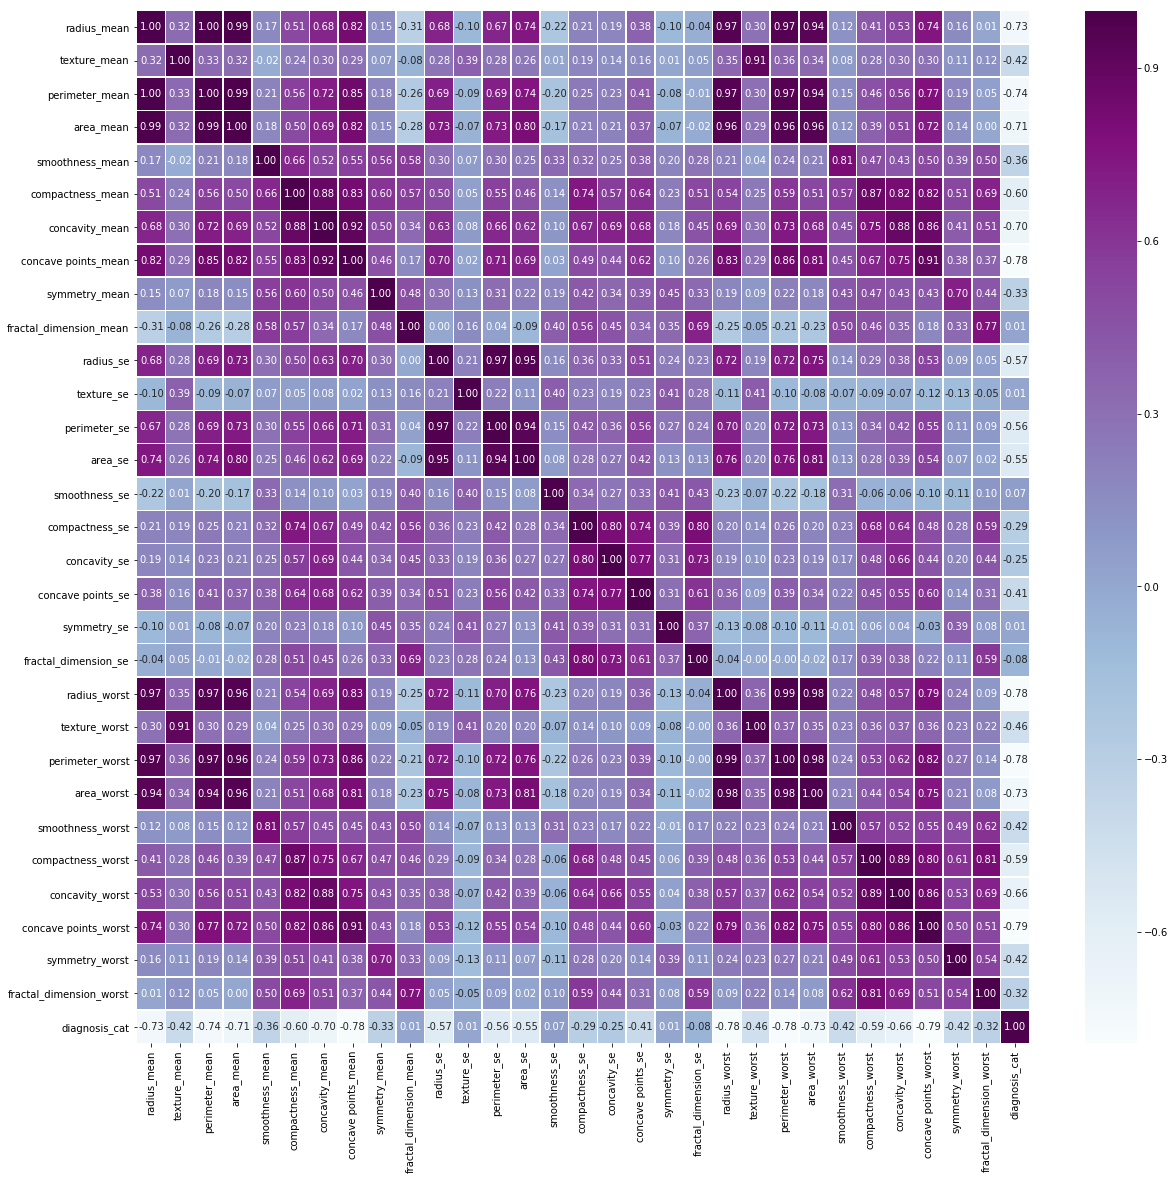

In [11]:
plt.rcParams['figure.figsize']=(20,19)
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt = ".2f", cmap="BuPu");

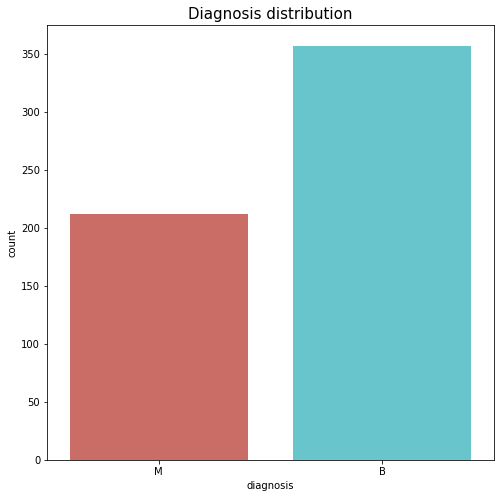

In [12]:
plt.rcParams['figure.figsize']=(8,8)
ax = sns.countplot(x = 'diagnosis', data = df, palette = 'hls');
ax.set_title(label='Diagnosis distribution', fontsize=15);

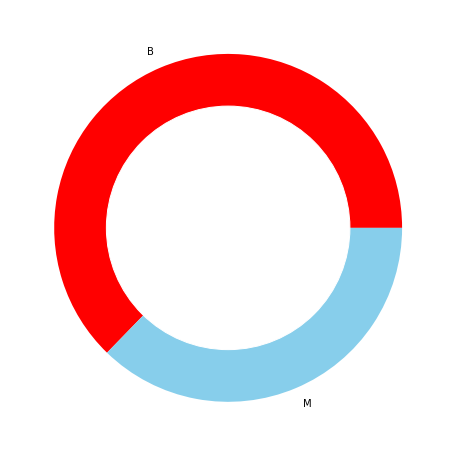

In [13]:
names= 'B', 'M'
size=df['diagnosis'].value_counts()

my_circle=plt.Circle((0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['red','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

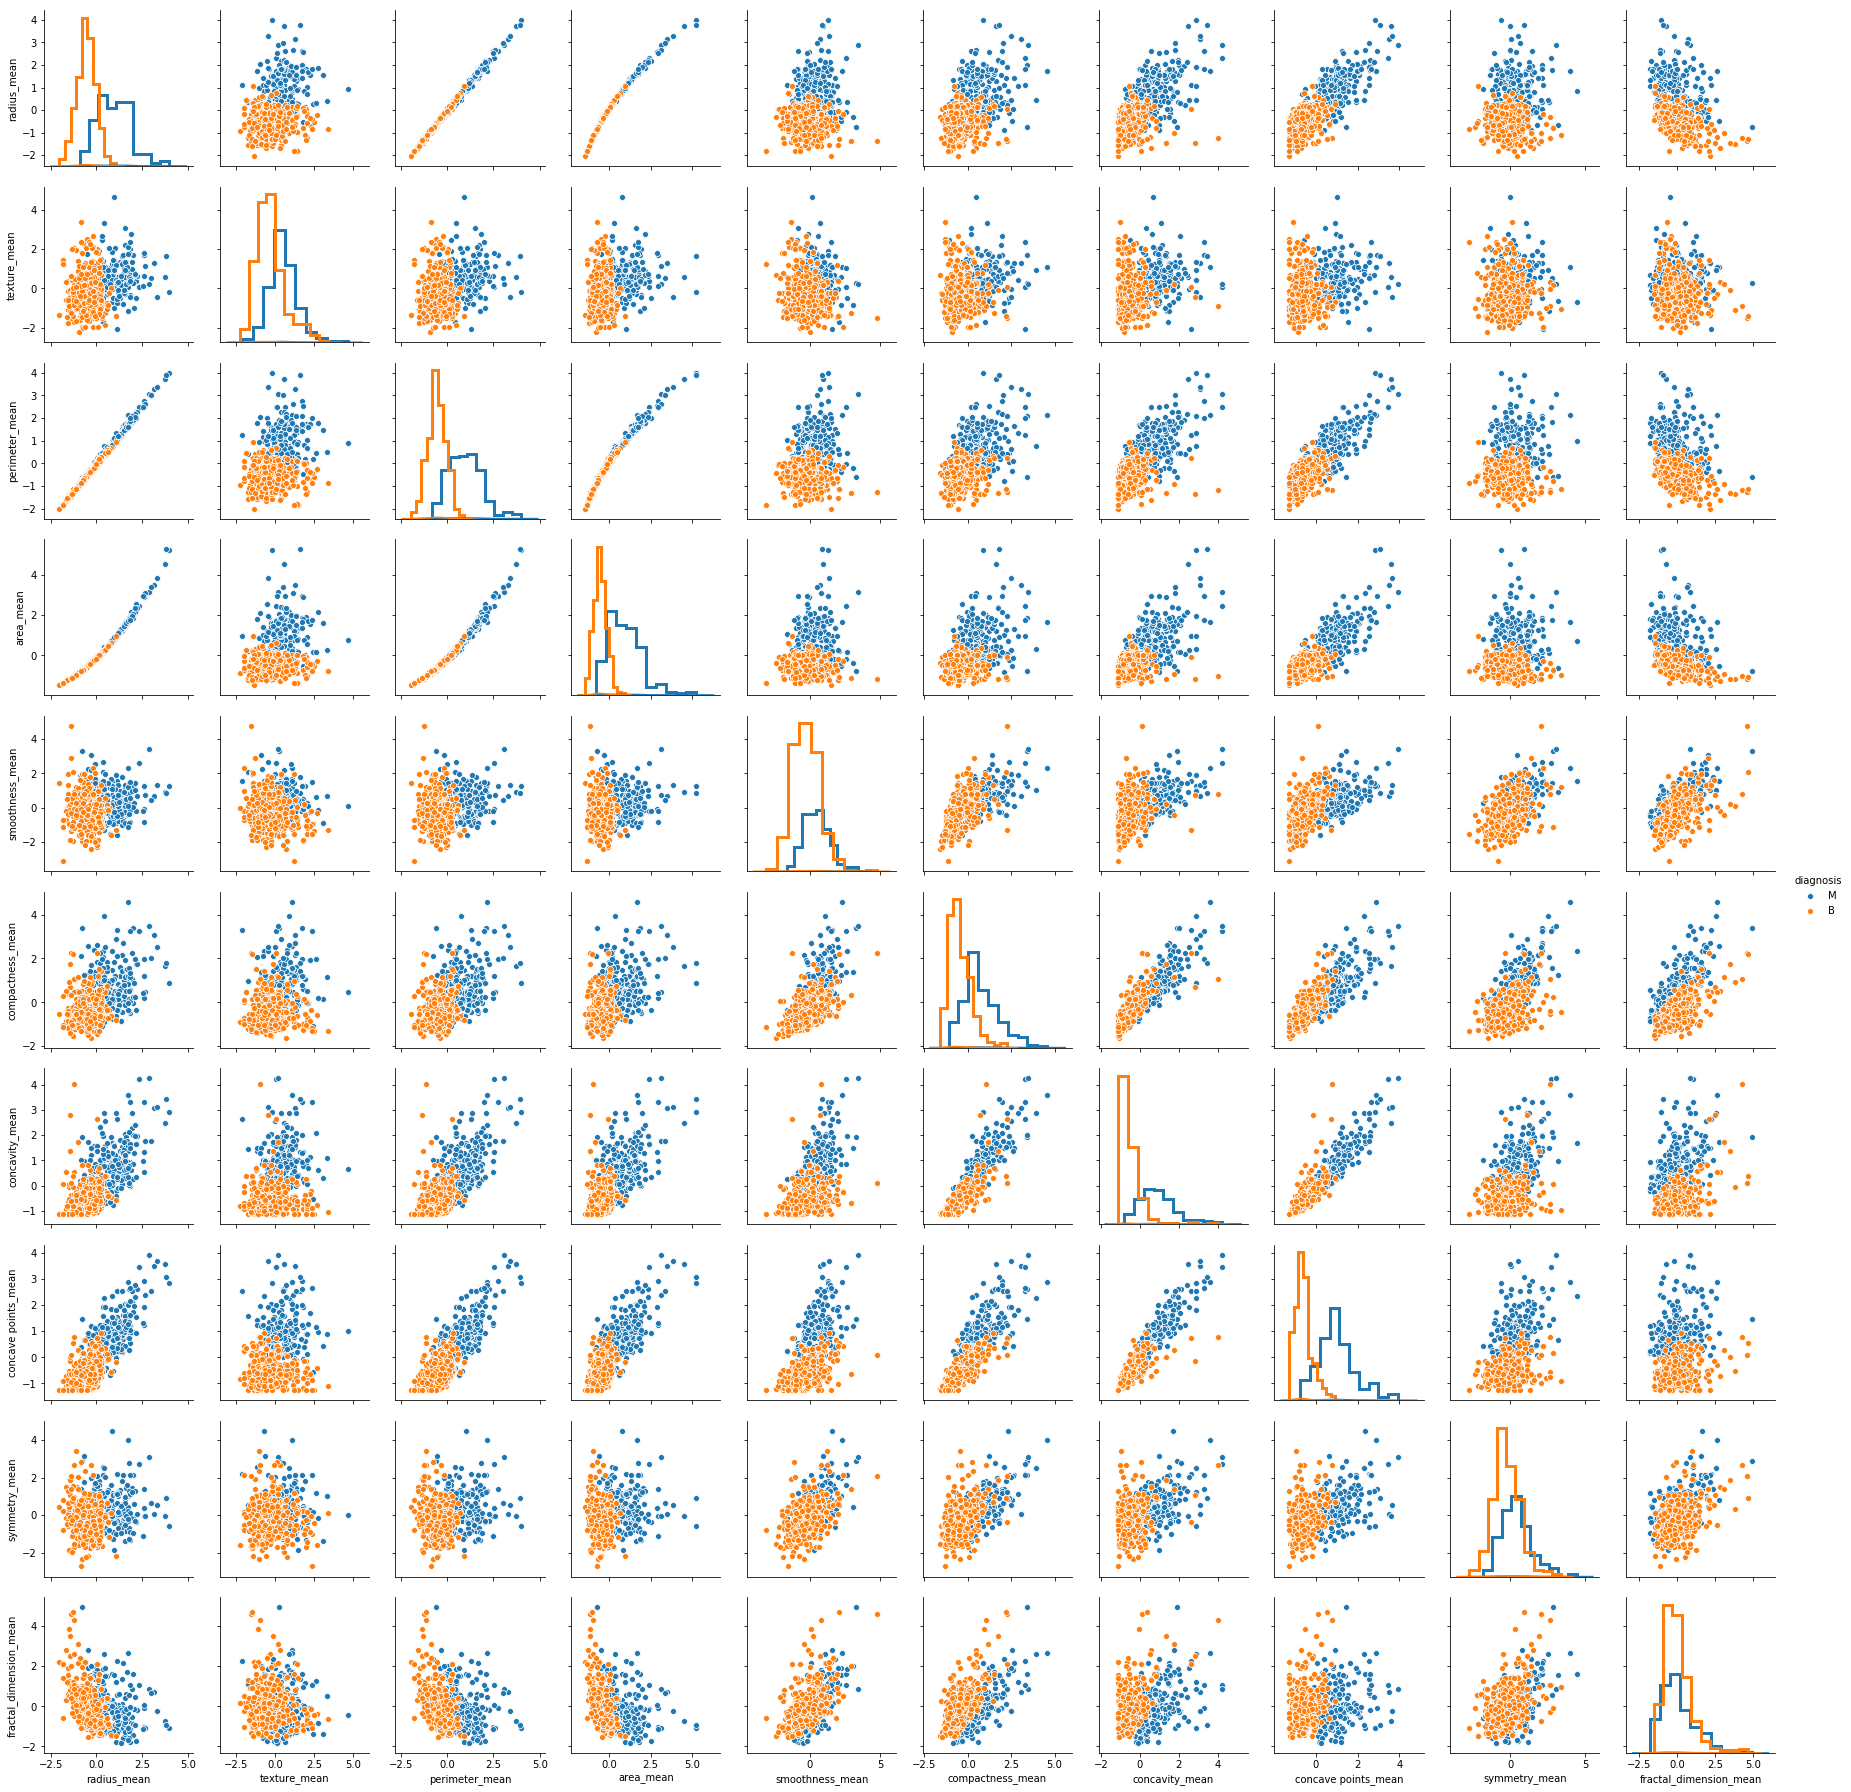

In [108]:
g = sns.pairplot(df.iloc[:,0:11], hue = 'diagnosis');
g = g.map_diag(plt.hist, histtype="step", linewidth=3)

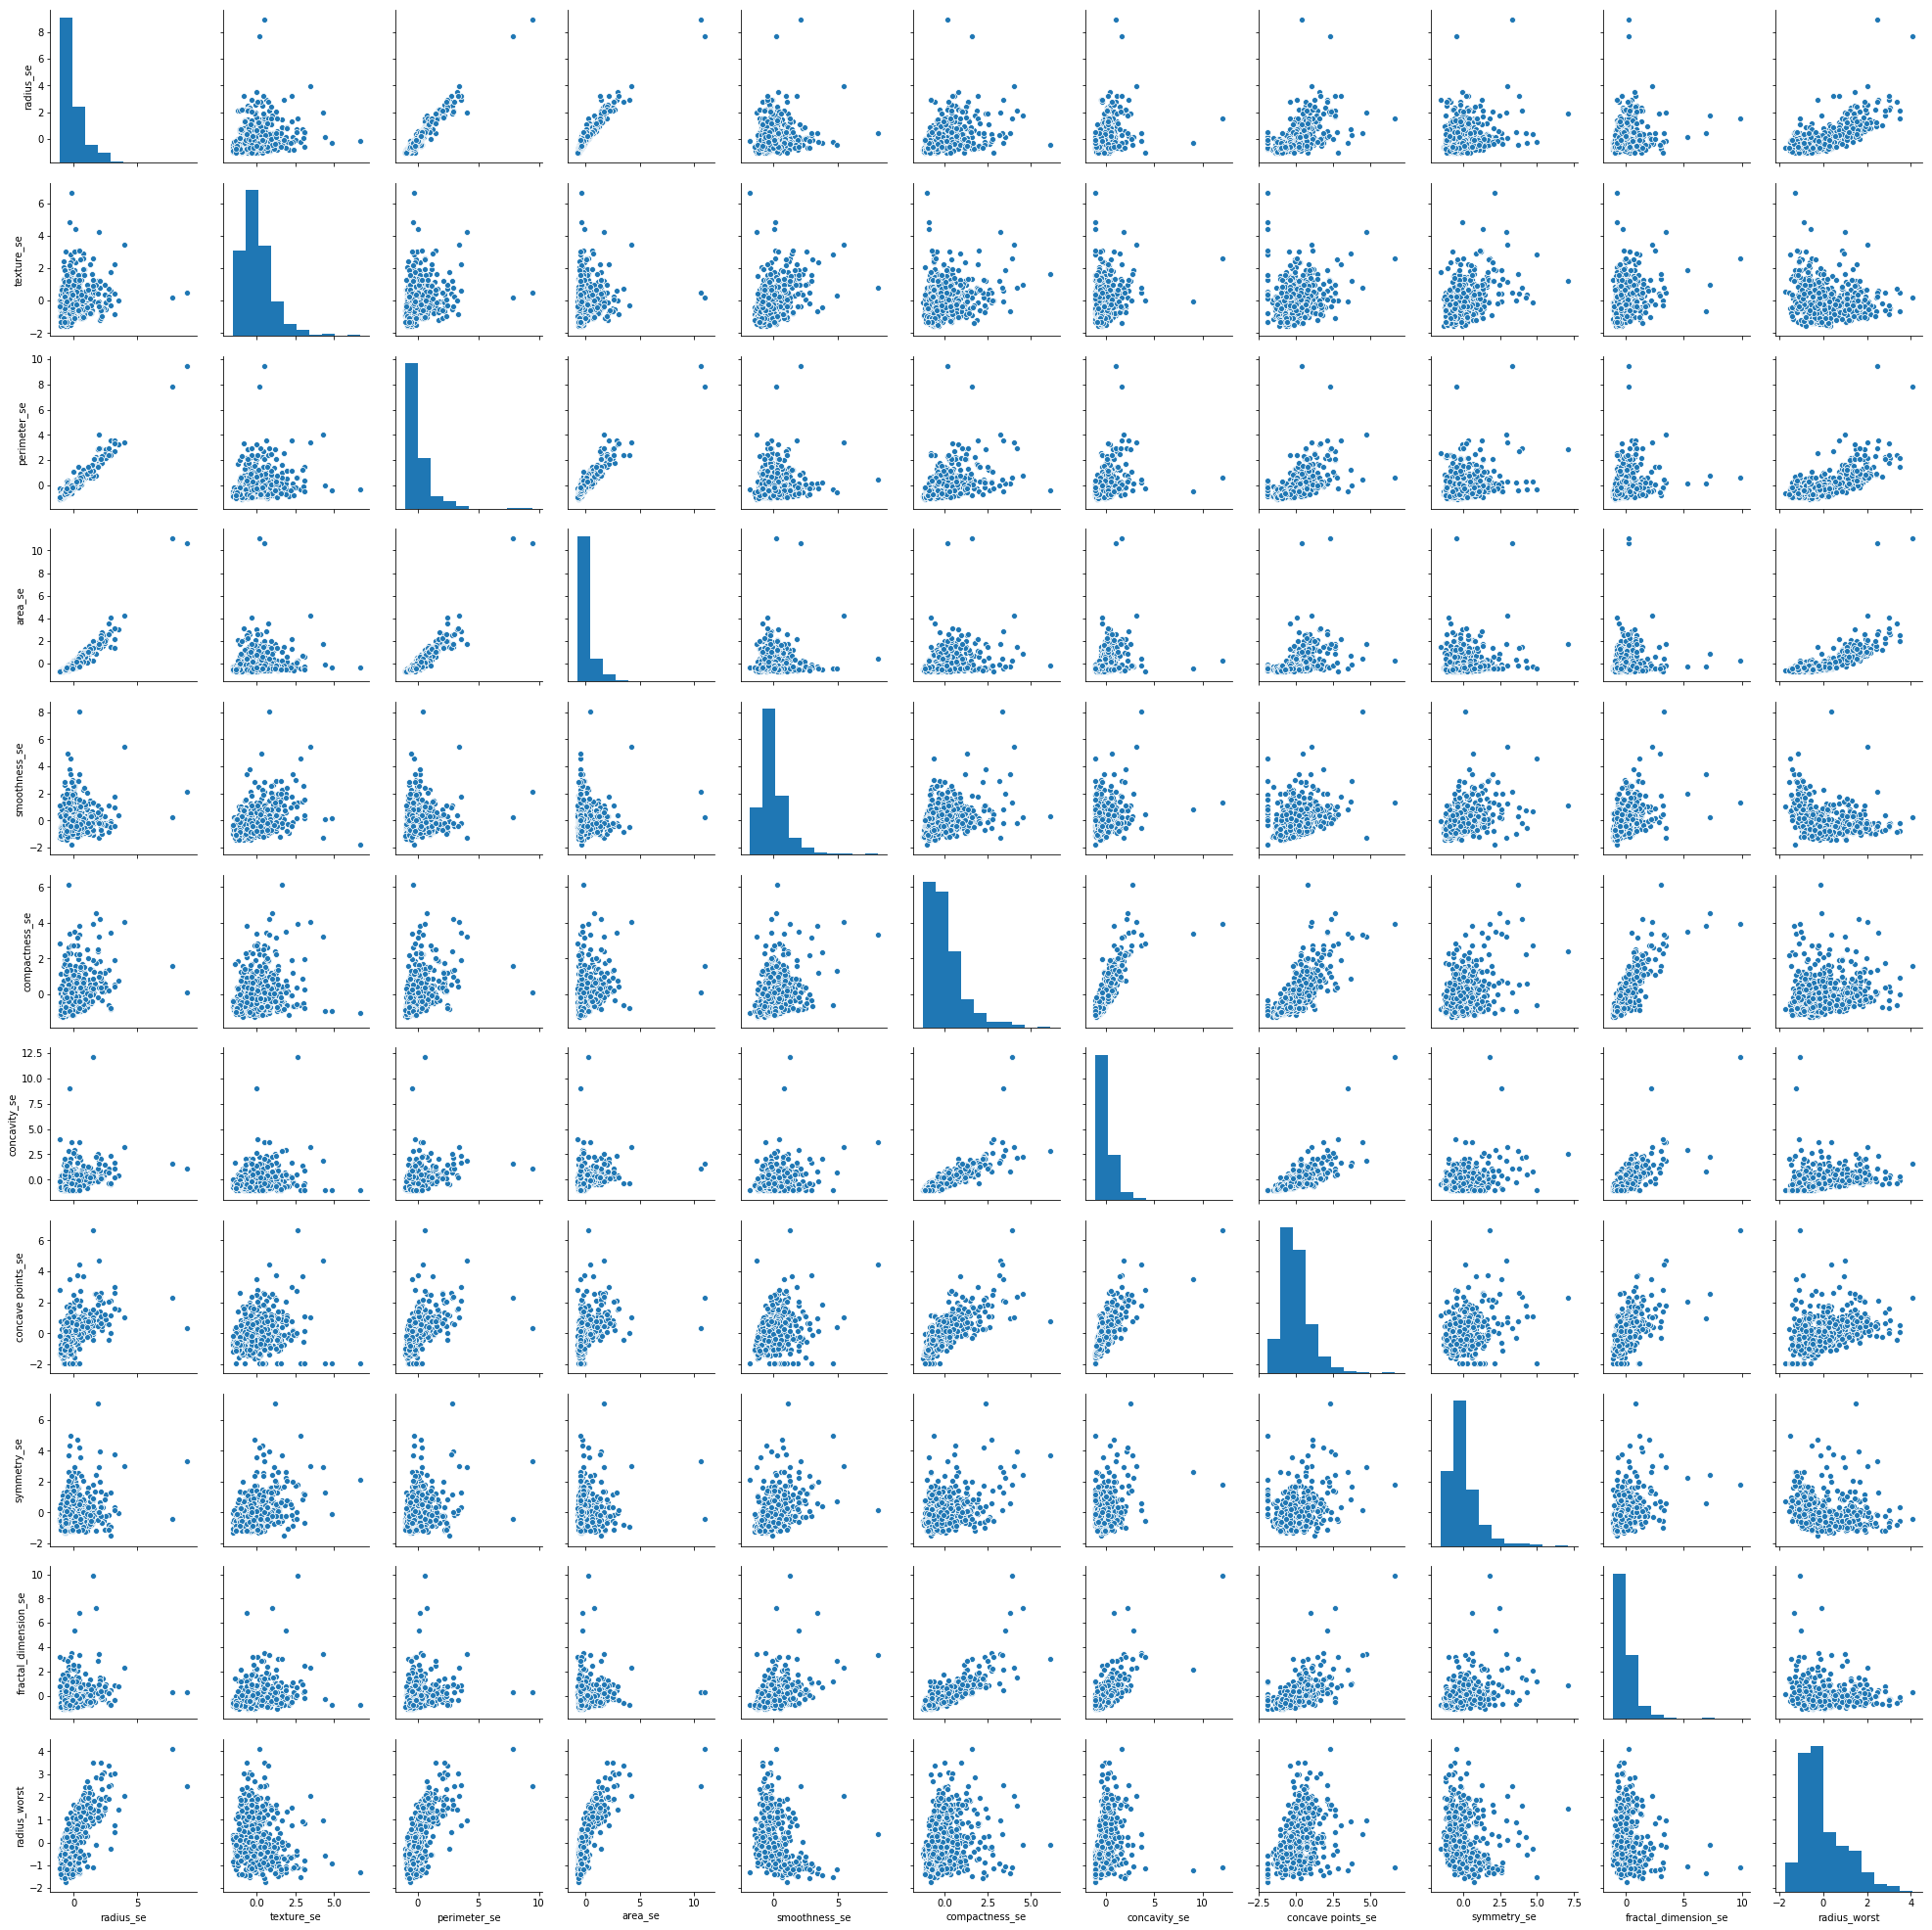

In [96]:
sns.pairplot(df.iloc[:,11:21]);

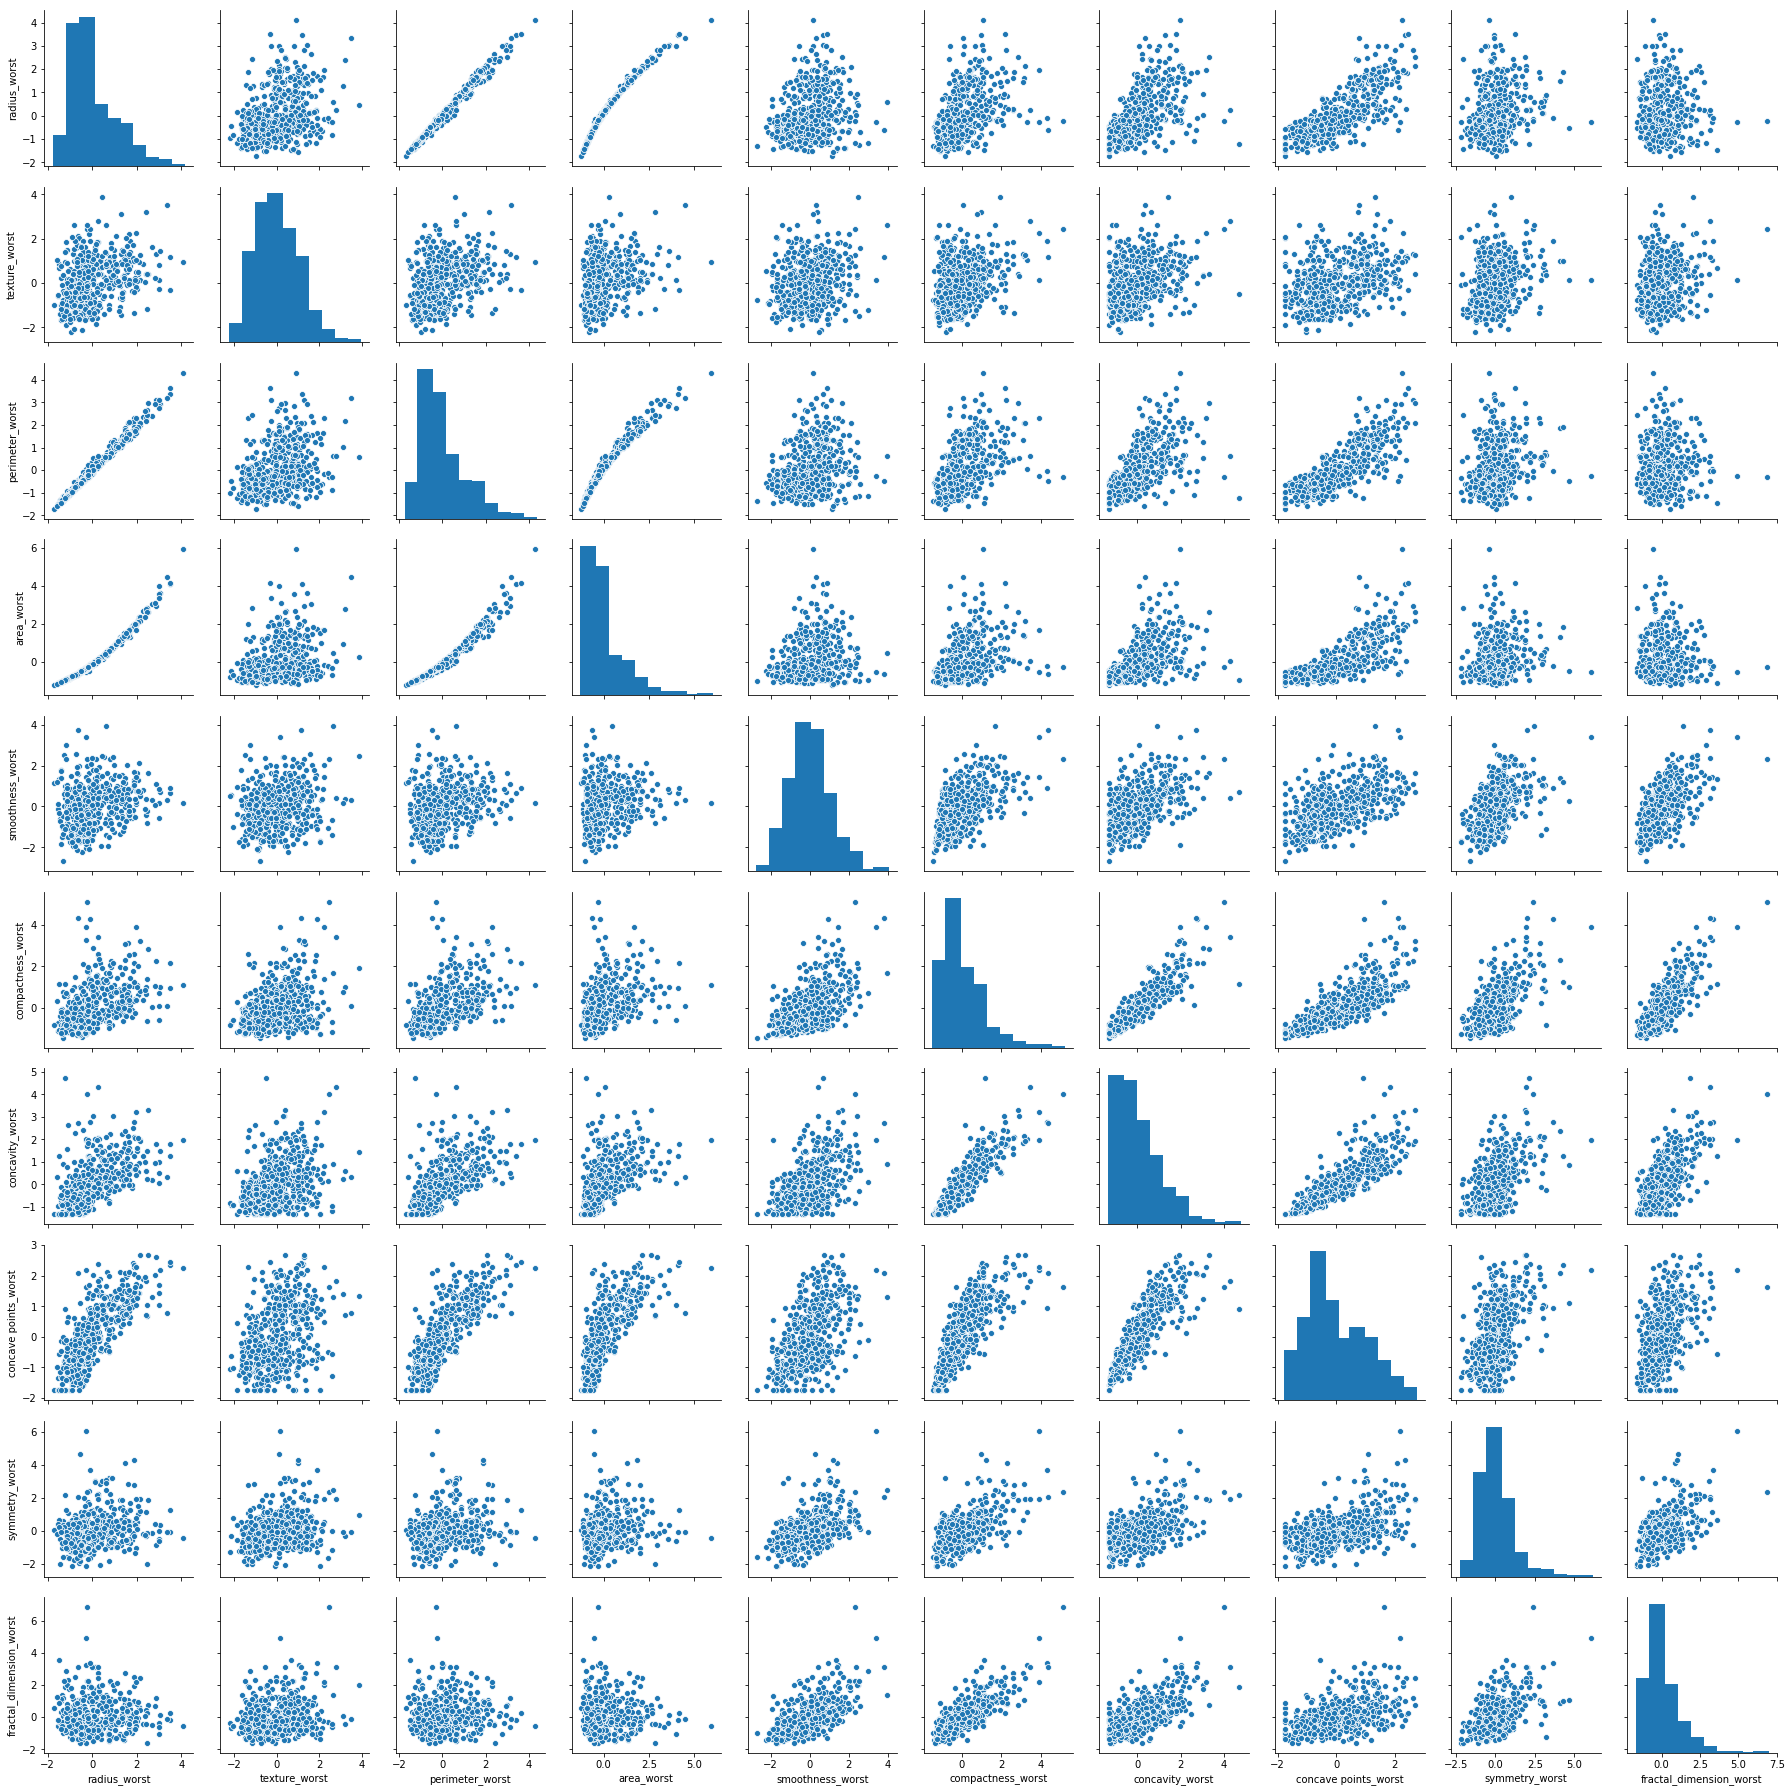

In [106]:
sns.pairplot(df.iloc[:,21:31]);

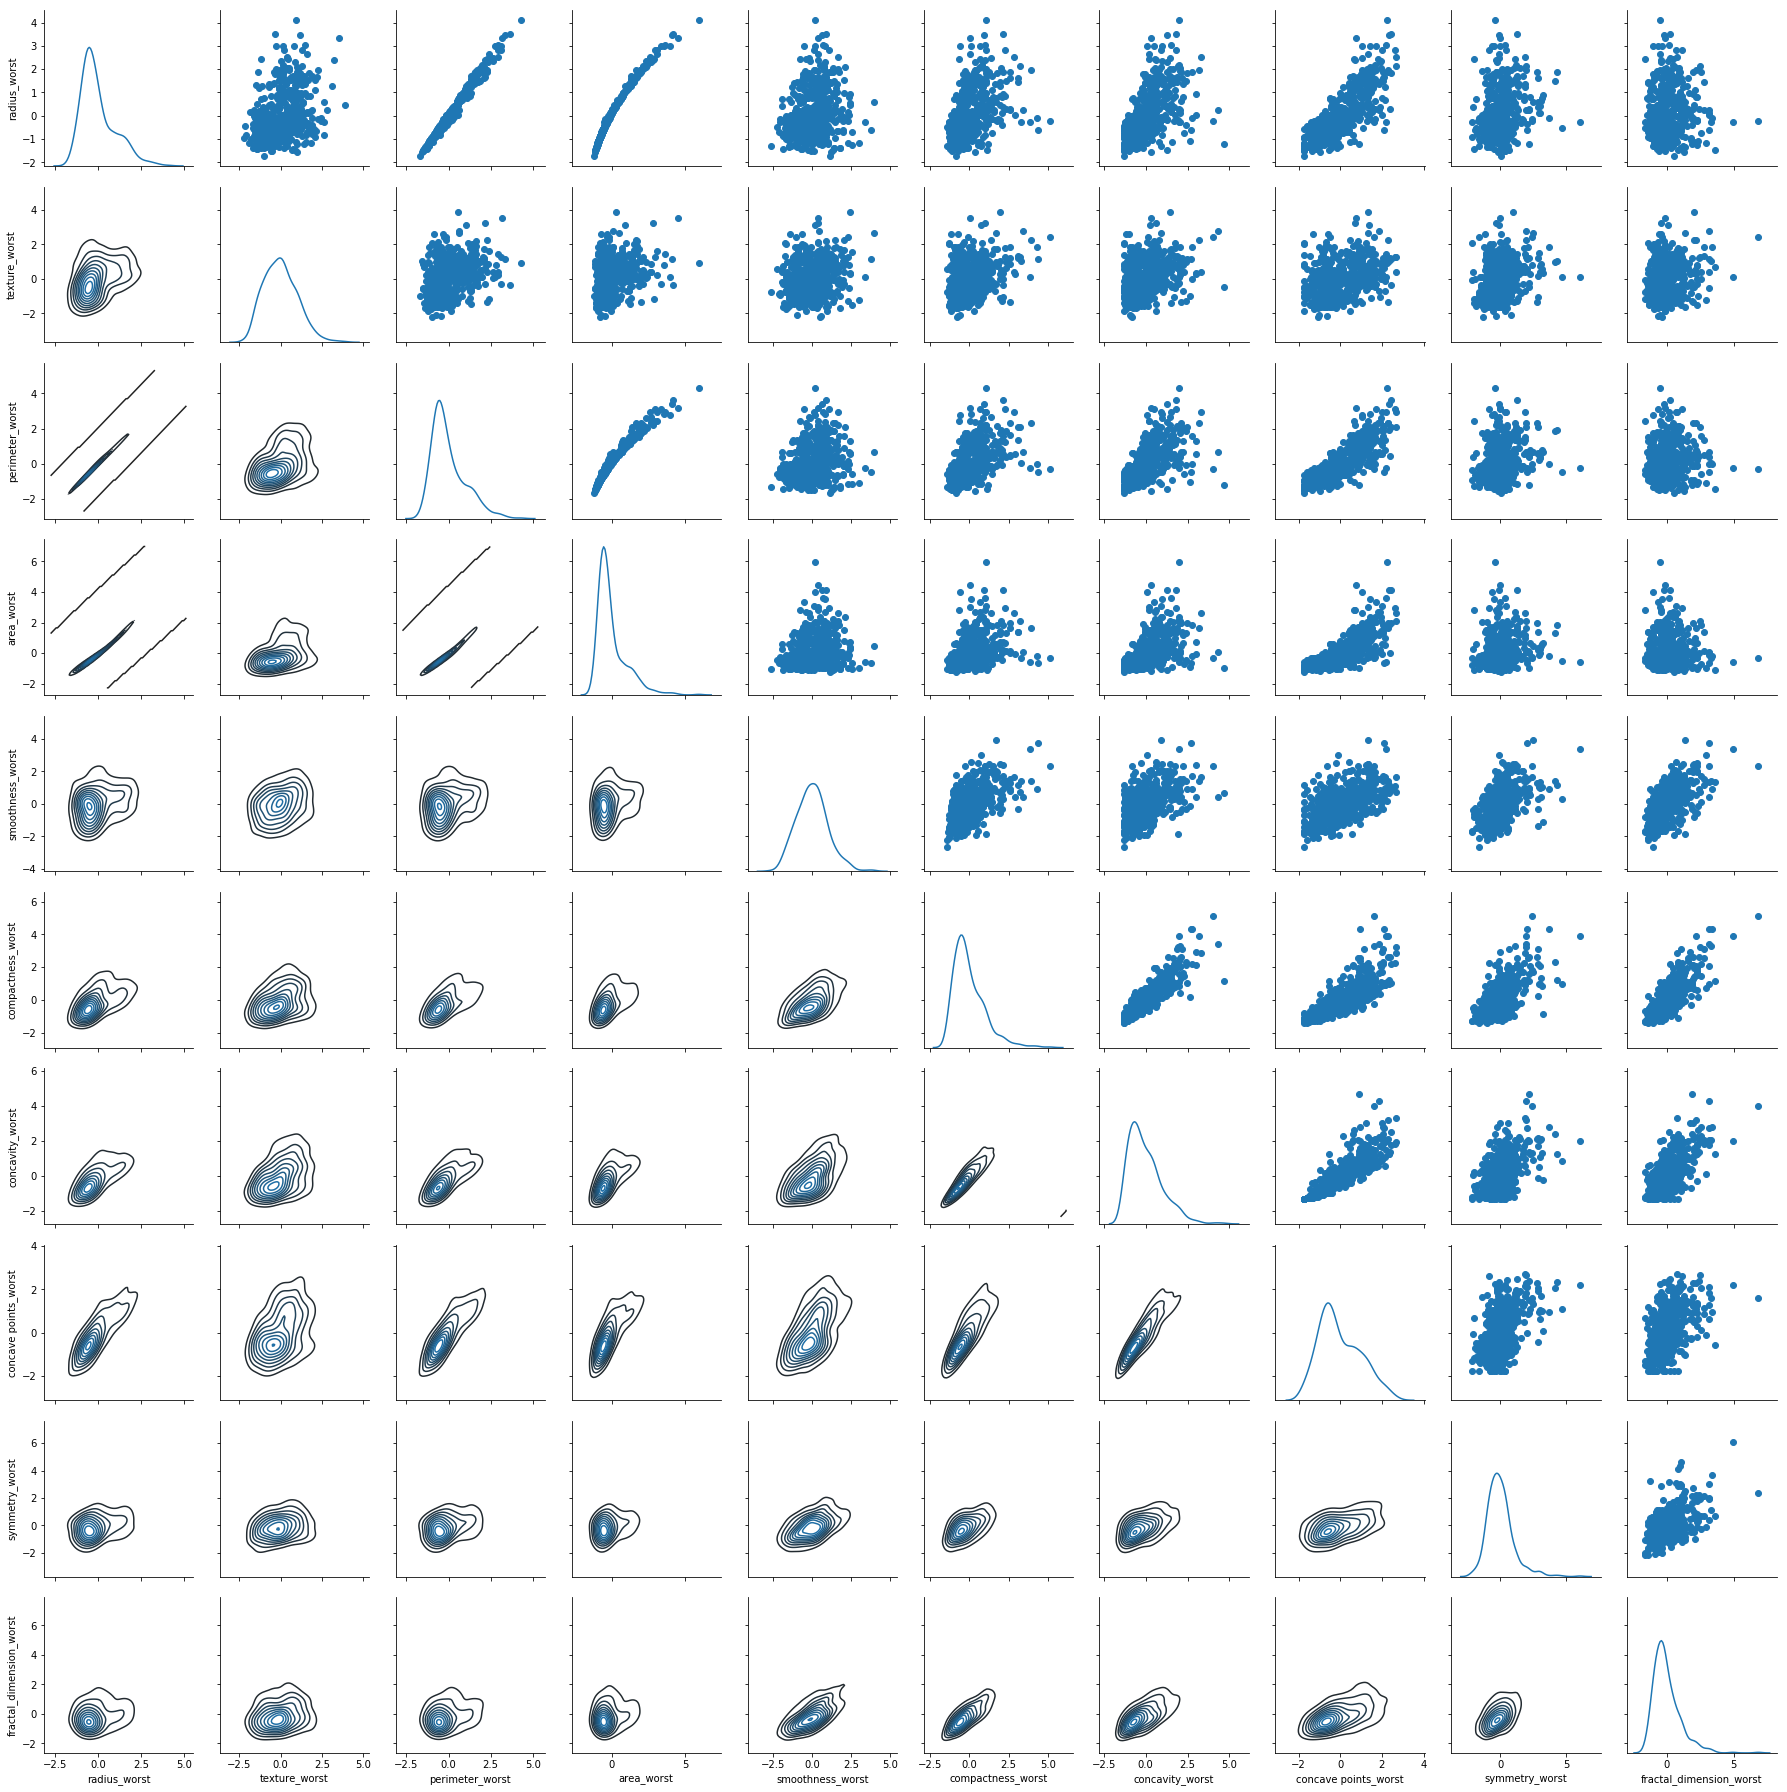

In [107]:
v = sns.PairGrid(df.iloc[:,21:31])
v.map_lower(sns.kdeplot);
v.map_upper(plt.scatter);
v.map_diag(sns.kdeplot);

In [77]:
def feats(df):
    feats_from_df = set(df.select_dtypes([np.int, np.float]).columns.values)
    bad_feats = {'diagnosis_cat'}
    return list(feats_from_df - bad_feats)

df_scaled = df
df_scaled[feats(df)] = preprocessing.scale(df[feats(df)])

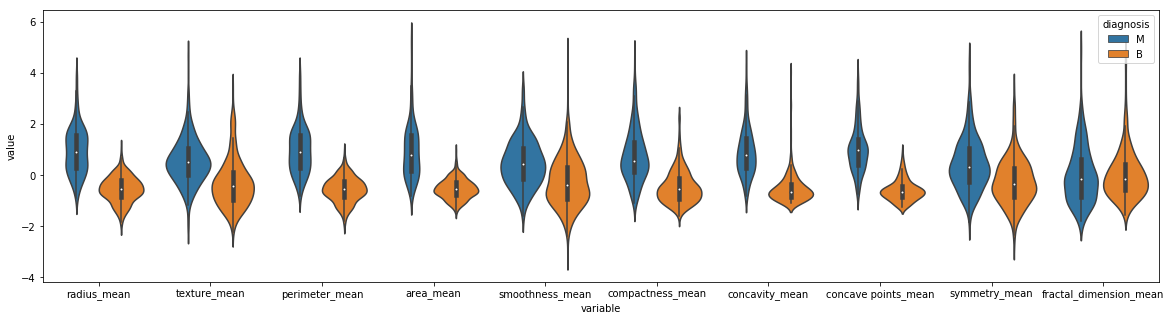

In [86]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

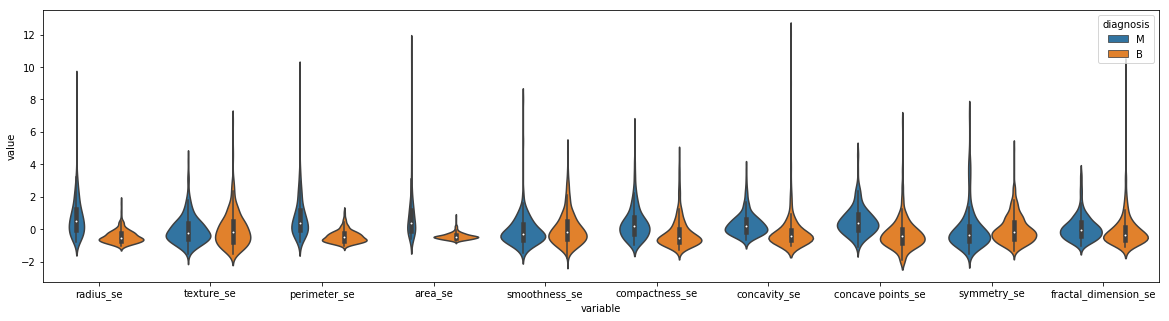

In [88]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_se', 'texture_se', 'perimeter_se', 'area_se',
                                    'smoothness_se', 'compactness_se', 'concavity_se',
                                    'concave points_se', 'symmetry_se', 'fractal_dimension_se'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

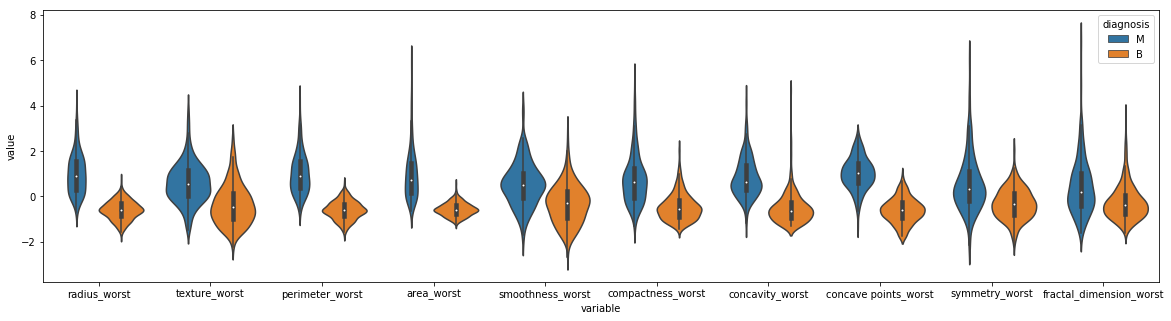

In [89]:
plt.subplots(figsize=(20,5))
df_melted = pd.melt(df_scaled, id_vars = "diagnosis", 
                      value_vars = ('radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                                    'smoothness_worst', 'compactness_worst', 'concavity_worst',
                                    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'))
sns.violinplot(x = "variable", y = "value", hue="diagnosis",data= df_melted);

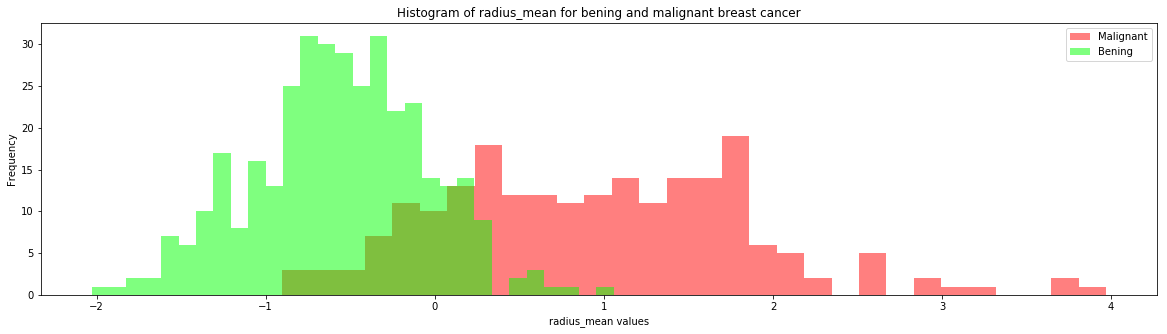

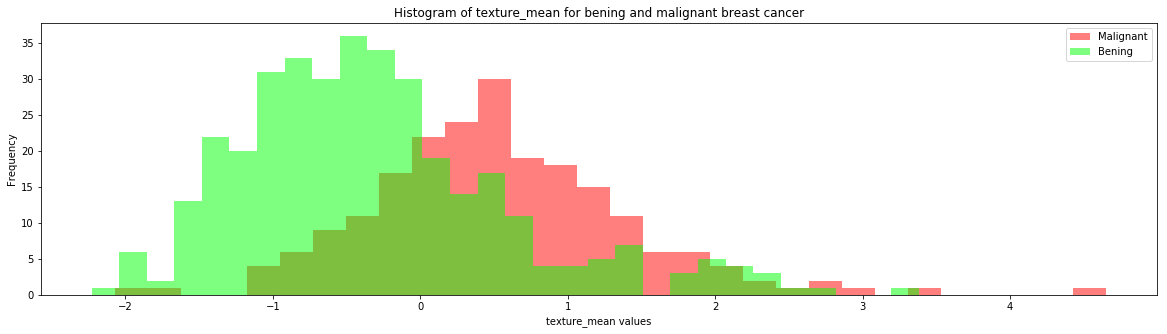

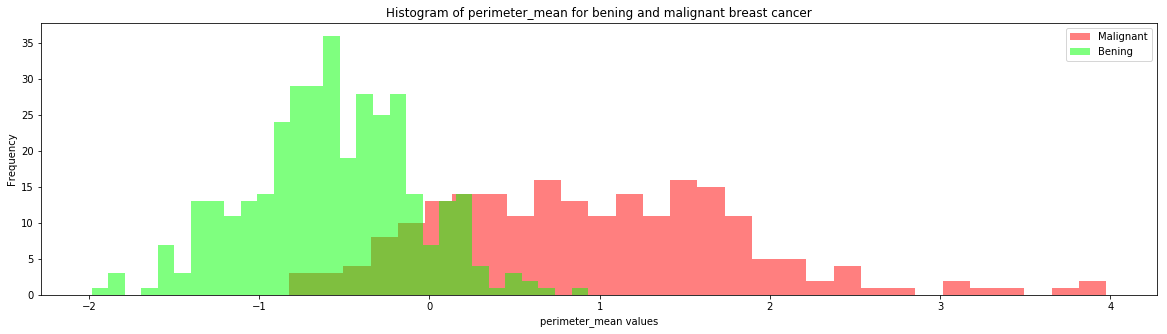

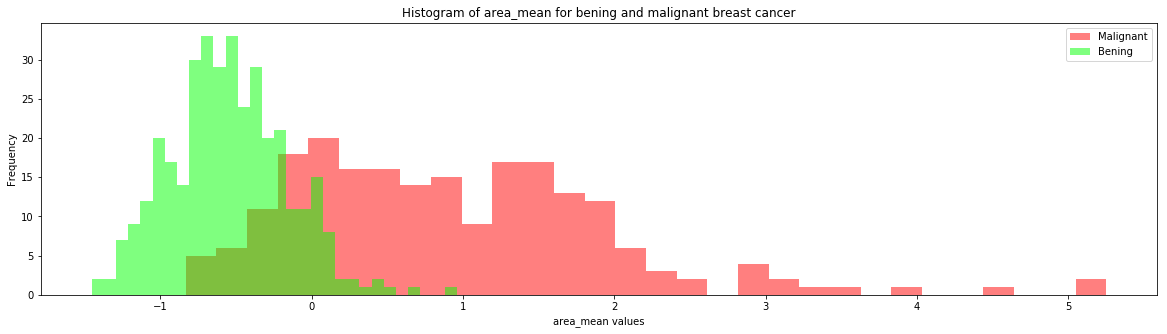

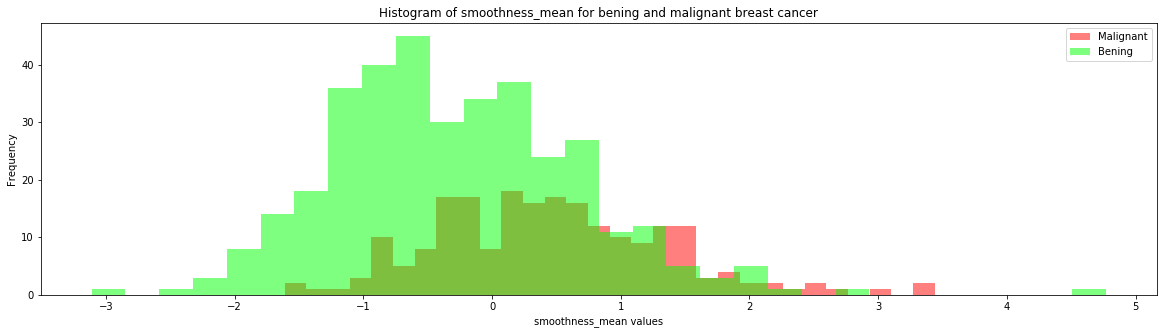

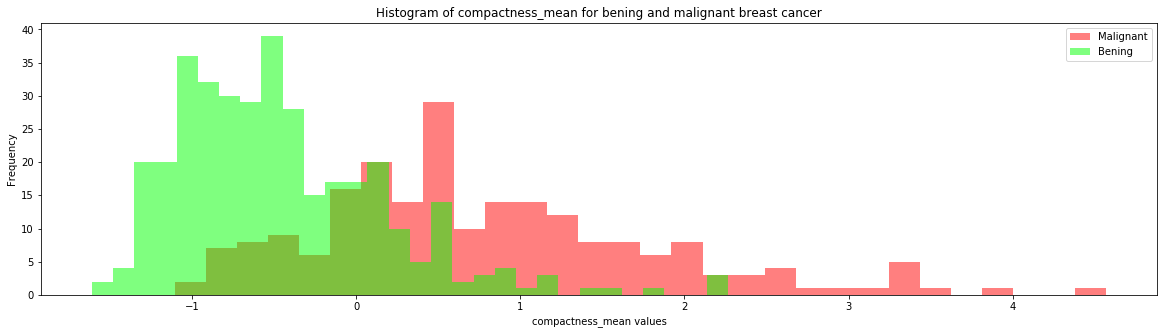

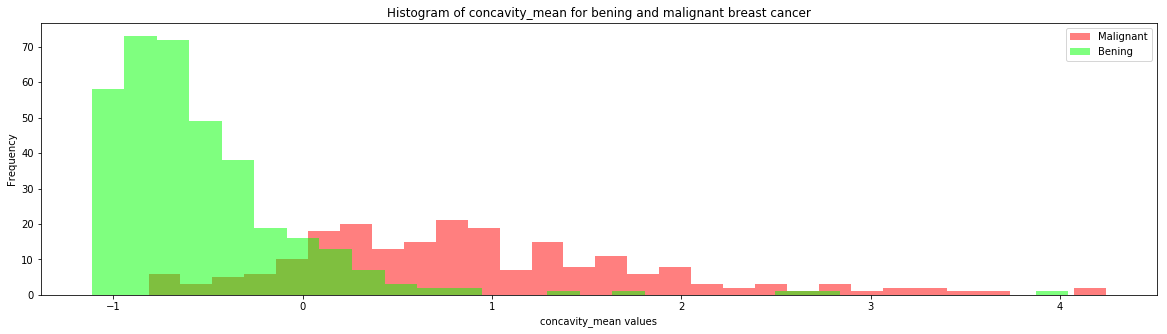

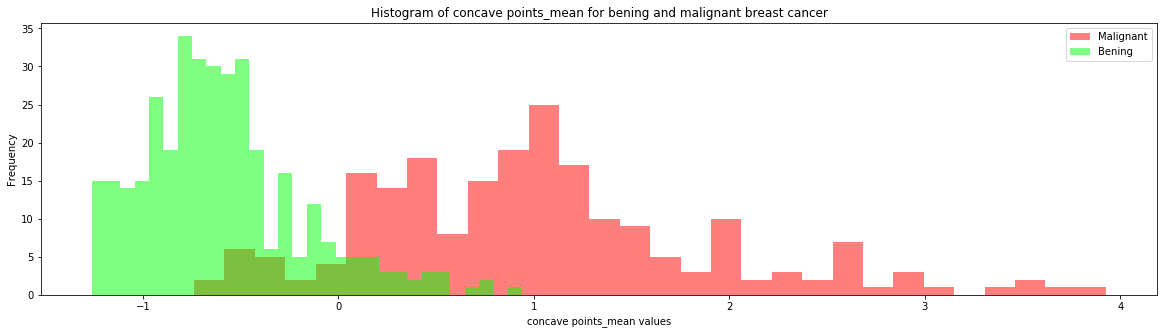

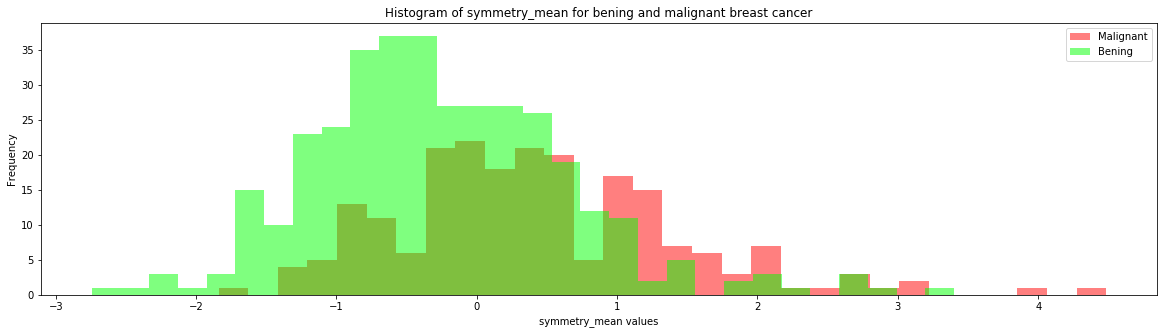

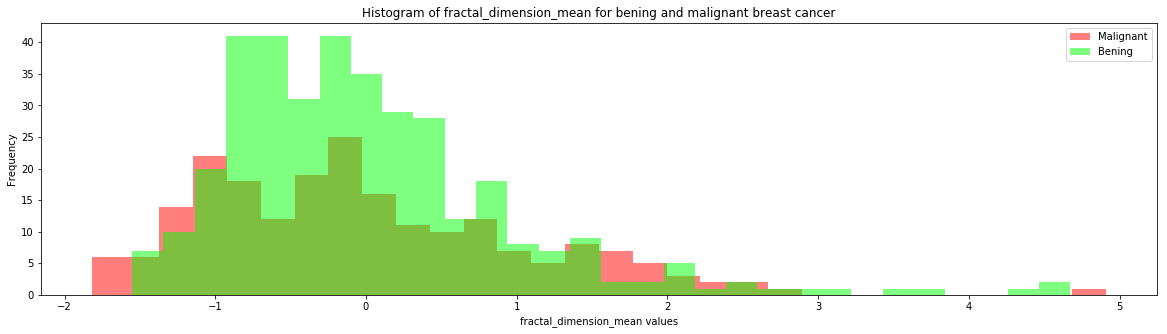

In [130]:
plt.rcParams['figure.figsize']=(20,5)

mean_value = ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean')

for i, feat in enumerate(mean_value):
    m = plt.hist(df[df["diagnosis"] == "M"][feat],bins=30,fc = (1,0,0,0.5),label = "Malignant")
    b = plt.hist(df[df["diagnosis"] == "B"][feat],bins=30,fc = (0,1,0,0.5),label = "Bening")
    plt.legend()
    plt.xlabel(mean_value[i] + ' values')
    plt.ylabel("Frequency")
    plt.title("Histogram of " + mean_value[i] +  " for bening and malignant breast cancer")
    plt.show()

In [ ]:
### Conclusion

### Models!